In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_line_ups = pd.read_csv("/content/Cleaned_match_line_ups")

In [4]:
match_line_ups.head()

,Unnamed: 0,matchid,hometeamname,awayteamname,ispitch,isbench,isstaff,country,id,officialname,officialsurname,shortname,role,jerseynumber,isgoalkeeper,jerseyname,iscaptain,tacticx,tacticy,numorder
0,0,2024442,Austria,North Macedonia,True,False,False,Austria,250056875,Daniel,Bachmann,Bachmann,goalkeepers,13.0,True,Bachmann,False,150.0,504.0,1.0
1,1,2024442,Austria,North Macedonia,True,False,False,Austria,101177,Andreas,Ulmer,Ulmer,defenders,2.0,False,Ulmer,False,562.0,153.0,2.0
2,2,2024442,Austria,North Macedonia,True,False,False,Austria,1909713,Aleksandar,Dragovic,Dragovic,defenders,3.0,False,Dragovic,False,345.0,737.0,3.0
3,3,2024442,Austria,North Macedonia,True,False,False,Austria,250020234,Martin,Hinteregger,Hinteregger,defenders,4.0,False,Hinteregger,False,370.0,317.0,4.0
4,4,2024442,Austria,North Macedonia,True,False,False,Austria,1906540,David,Alaba,Alaba,defenders,8.0,False,Alaba,True,328.0,455.0,5.0


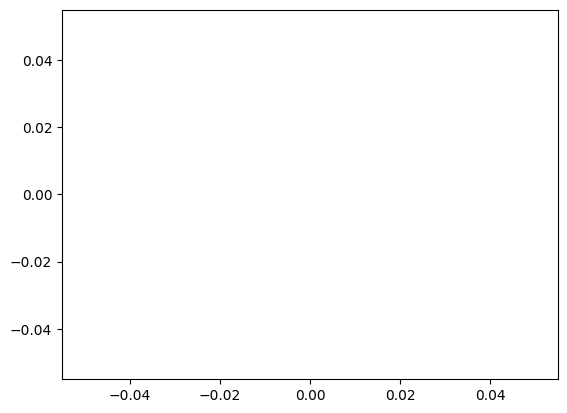

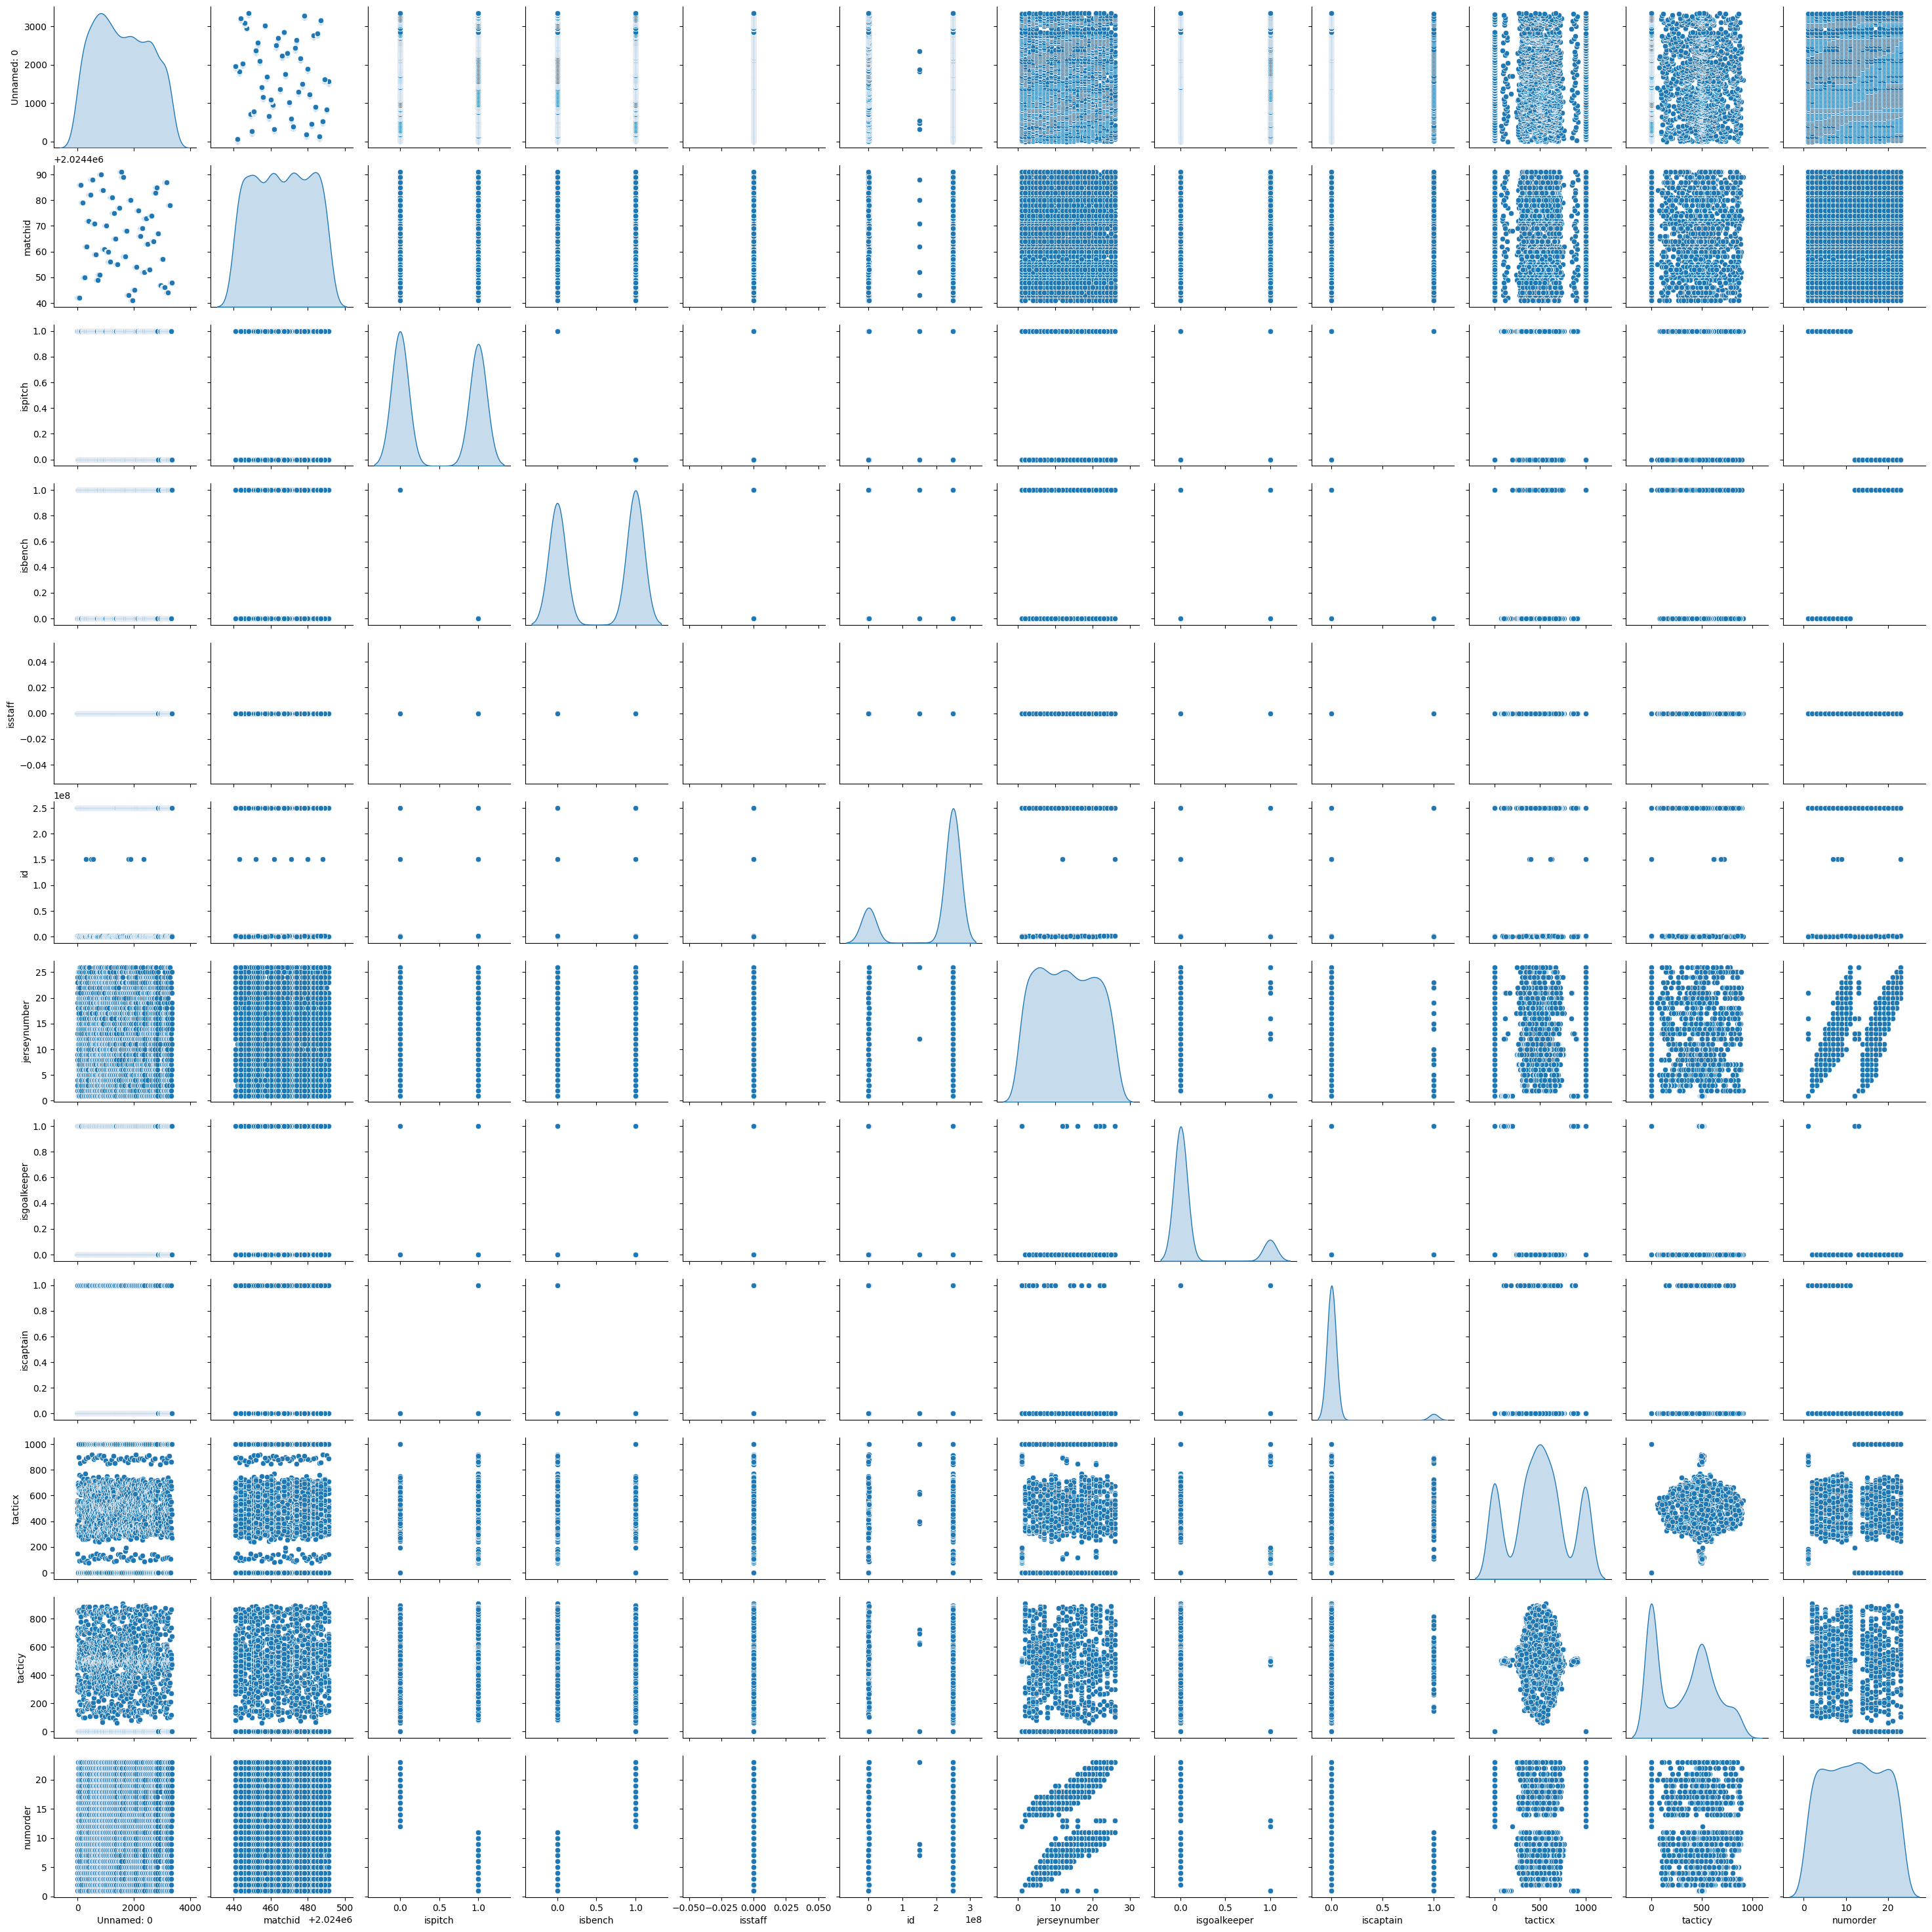

In [5]:
plt.plot(figsize=(16,6))
sns.pairplot(data=match_line_ups,diag_kind='kde')

In [6]:
match_line_ups

,Unnamed: 0,matchid,hometeamname,awayteamname,ispitch,isbench,isstaff,country,id,officialname,officialsurname,shortname,role,jerseynumber,isgoalkeeper,jerseyname,iscaptain,tacticx,tacticy,numorder
0,0,2024442,Austria,North Macedonia,True,False,False,Austria,250056875,Daniel,Bachmann,Bachmann,goalkeepers,13.0,True,Bachmann,False,150.0,504.0,1.0
1,1,2024442,Austria,North Macedonia,True,False,False,Austria,101177,Andreas,Ulmer,Ulmer,defenders,2.0,False,Ulmer,False,562.0,153.0,2.0
2,2,2024442,Austria,North Macedonia,True,False,False,Austria,1909713,Aleksandar,Dragovic,Dragovic,defenders,3.0,False,Dragovic,False,345.0,737.0,3.0
3,3,2024442,Austria,North Macedonia,True,False,False,Austria,250020234,Martin,Hinteregger,Hinteregger,defenders,4.0,False,Hinteregger,False,370.0,317.0,4.0
4,4,2024442,Austria,North Macedonia,True,False,False,Austria,1906540,David,Alaba,Alaba,defenders,8.0,False,Alaba,True,328.0,455.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,3348,2024448,Wales,Switzerland,False,True,False,Switzerland,250110901,Christian,Fassnacht,Fassnacht,midfielders,16.0,False,Fassnacht,False,1000.0,0.0,19.0
2039,3349,2024448,Wales,Switzerland,False,True,False,Switzerland,250019346,Loris,Benito,Benito,defenders,17.0,False,Benito,False,1000.0,0.0,20.0
2040,3350,2024448,Wales,Switzerland,False,True,False,Switzerland,1905353,Admir,Mehmedi,Mehmedi,forwards,18.0,False,Mehmedi,False,1000.0,0.0,21.0
2041,3351,2024448,Wales,Switzerland,False,True,False,Switzerland,102130,Mario,Gavranovic,Gavranovic,forwards,19.0,False,Gavranovic,False,269.0,475.0,22.0


In [7]:
x = match_line_ups[['tacticx','jerseynumber']]
y = match_line_ups['tacticy']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=11)

In [9]:
from sklearn.ensemble import RandomForestClassifier
randclass = RandomForestClassifier(n_estimators = 20, random_state = 0)
randclass.fit(X_train,Y_train)
y_pred = randclass.predict(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=100)
log.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [12]:
from sklearn import tree
treeclass = tree.DecisionTreeClassifier()
treeclass = treeclass.fit(X_train, Y_train)

In [13]:
from sklearn.metrics import classification_report
def report(model):
    preds = model.predict(X_test)
    print(classification_report(Y_test,preds))

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.34      0.99      0.51       208
        67.0       0.00      0.00      0.00         1
        79.0       0.00      0.00      0.00         1
       108.0       0.00      0.00      0.00         1
       115.0       0.00      0.00      0.00         1
       121.0       0.00      0.00      0.00         1
       124.0       0.00      0.00      0.00         1
       128.0       0.00      0.00      0.00         1
       132.0       0.00      0.00      0.00         2
       134.0       0.00      0.00      0.00         1
       135.0       0.00      0.00      0.00         3
       136.0       0.00      0.00      0.00         1
       140.0       0.00      0.00      0.00         2
       142.0       0.00      0.00      0.00         1
       144.0       0.00      0.00      0.00         1
       145.0       0.00      0.00      0.00         1
       146.0       0.00      0.00      0.00         1
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

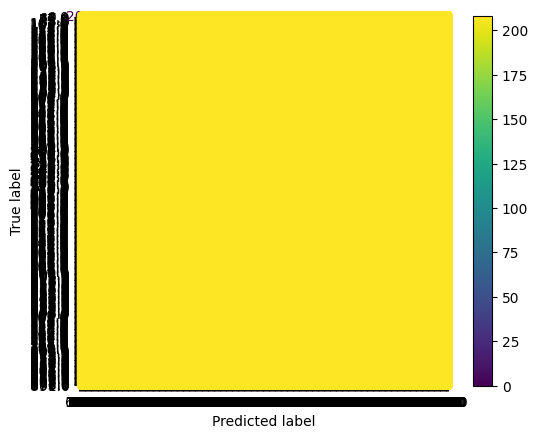

In [14]:
print("Logistic Regression")
report(log)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

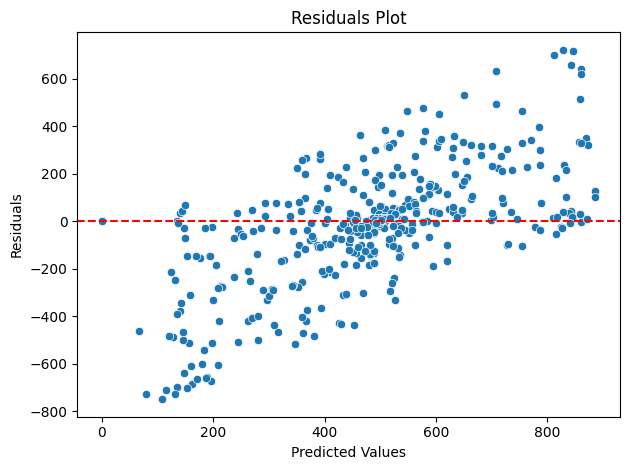

In [16]:
residuals_log = Y_test - y_pred
sns.scatterplot(x= Y_test, y = residuals_log)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.tight_layout()
plt.show()

SVC
              precision    recall  f1-score   support

         0.0       0.96      0.46      0.62       208
        67.0       0.00      0.00      0.00         1
        79.0       0.00      0.00      0.00         1
       108.0       0.00      0.00      0.00         1
       115.0       0.00      0.00      0.00         1
       121.0       0.00      0.00      0.00         1
       124.0       0.00      0.00      0.00         1
       128.0       0.00      0.00      0.00         1
       132.0       0.00      0.00      0.00         2
       134.0       0.00      0.00      0.00         1
       135.0       0.00      0.00      0.00         3
       136.0       0.00      0.00      0.00         1
       140.0       0.00      0.00      0.00         2
       142.0       0.00      0.00      0.00         1
       144.0       0.00      0.00      0.00         1
       145.0       0.00      0.00      0.00         1
       146.0       0.00      0.00      0.00         1
       147.0       0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


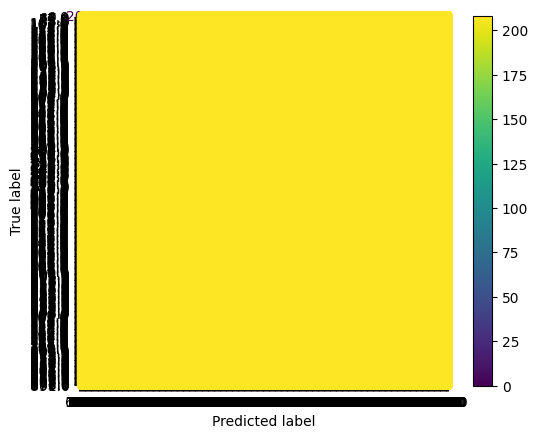

In [17]:
print("SVC")
report(svc)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

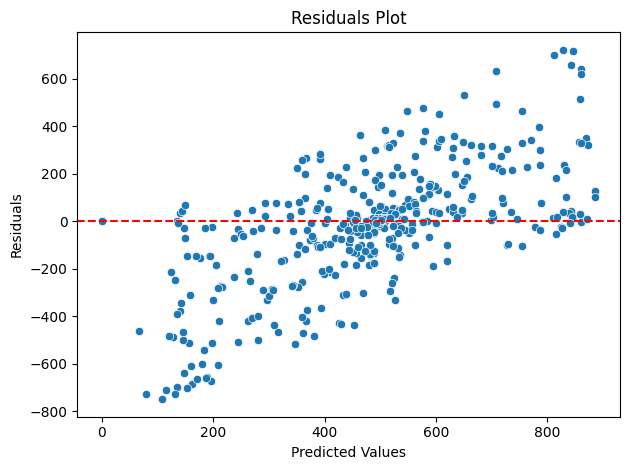

In [18]:
residuals_svc = Y_test - y_pred
sns.scatterplot(x= Y_test, y = residuals_svc)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.tight_layout()
plt.show()

Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       208
        67.0       0.00      0.00      0.00         1
        77.0       0.00      0.00      0.00         0
        79.0       0.00      0.00      0.00         1
        83.0       0.00      0.00      0.00         0
        85.0       0.00      0.00      0.00         0
       101.0       0.00      0.00      0.00         0
       102.0       0.00      0.00      0.00         0
       103.0       0.00      0.00      0.00         0
       107.0       0.00      0.00      0.00         0
       108.0       0.00      0.00      0.00         1
       111.0       0.00      0.00      0.00         0
       115.0       0.00      0.00      0.00         1
       118.0       0.00      0.00      0.00         0
       121.0       0.00      0.00      0.00         1
       124.0       0.00      0.00      0.00         1
       125.0       0.00      0.00      0.00         0
       128.0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

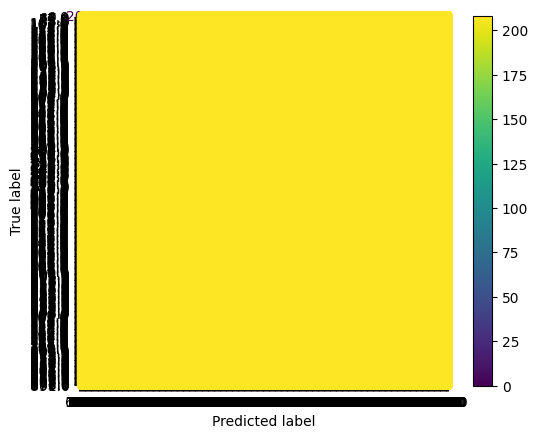

In [19]:
print("Random Forest")
report(randclass)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

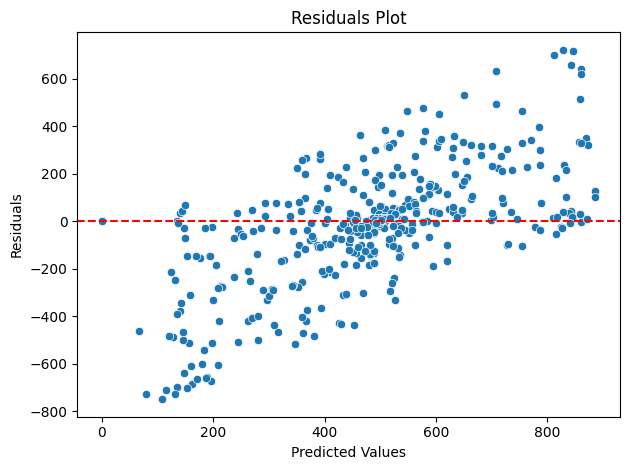

In [20]:
residuals_rf = Y_test - y_pred
sns.scatterplot(x= Y_test, y = residuals_rf)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.tight_layout()
plt.show()

Decition tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       208
        67.0       0.00      0.00      0.00         1
        77.0       0.00      0.00      0.00         0
        79.0       0.00      0.00      0.00         1
        85.0       0.00      0.00      0.00         0
       101.0       0.00      0.00      0.00         0
       102.0       0.00      0.00      0.00         0
       103.0       0.00      0.00      0.00         0
       107.0       0.00      0.00      0.00         0
       108.0       0.00      0.00      0.00         1
       111.0       0.00      0.00      0.00         0
       115.0       0.00      0.00      0.00         1
       118.0       0.00      0.00      0.00         0
       121.0       0.00      0.00      0.00         1
       124.0       0.00      0.00      0.00         1
       125.0       0.00      0.00      0.00         0
       128.0       0.00      0.00      0.00         1
       132.0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

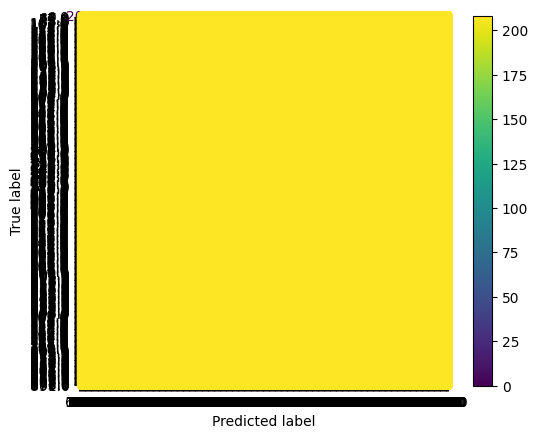

In [21]:
print("Decition tree")
report(treeclass)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

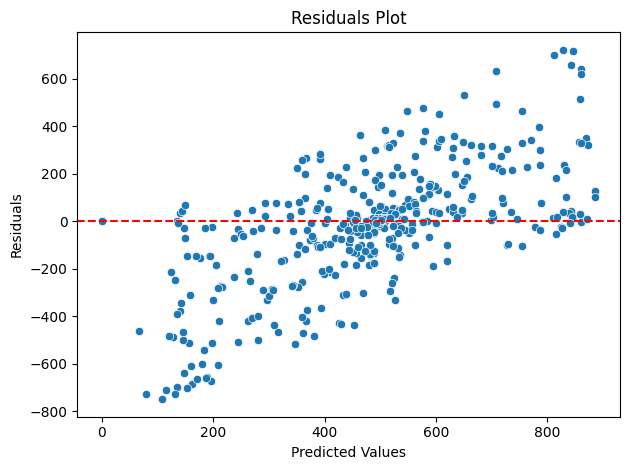

In [22]:
residuals_dt = Y_test - y_pred
sns.scatterplot(x= Y_test, y = residuals_dt)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.tight_layout()
plt.show()

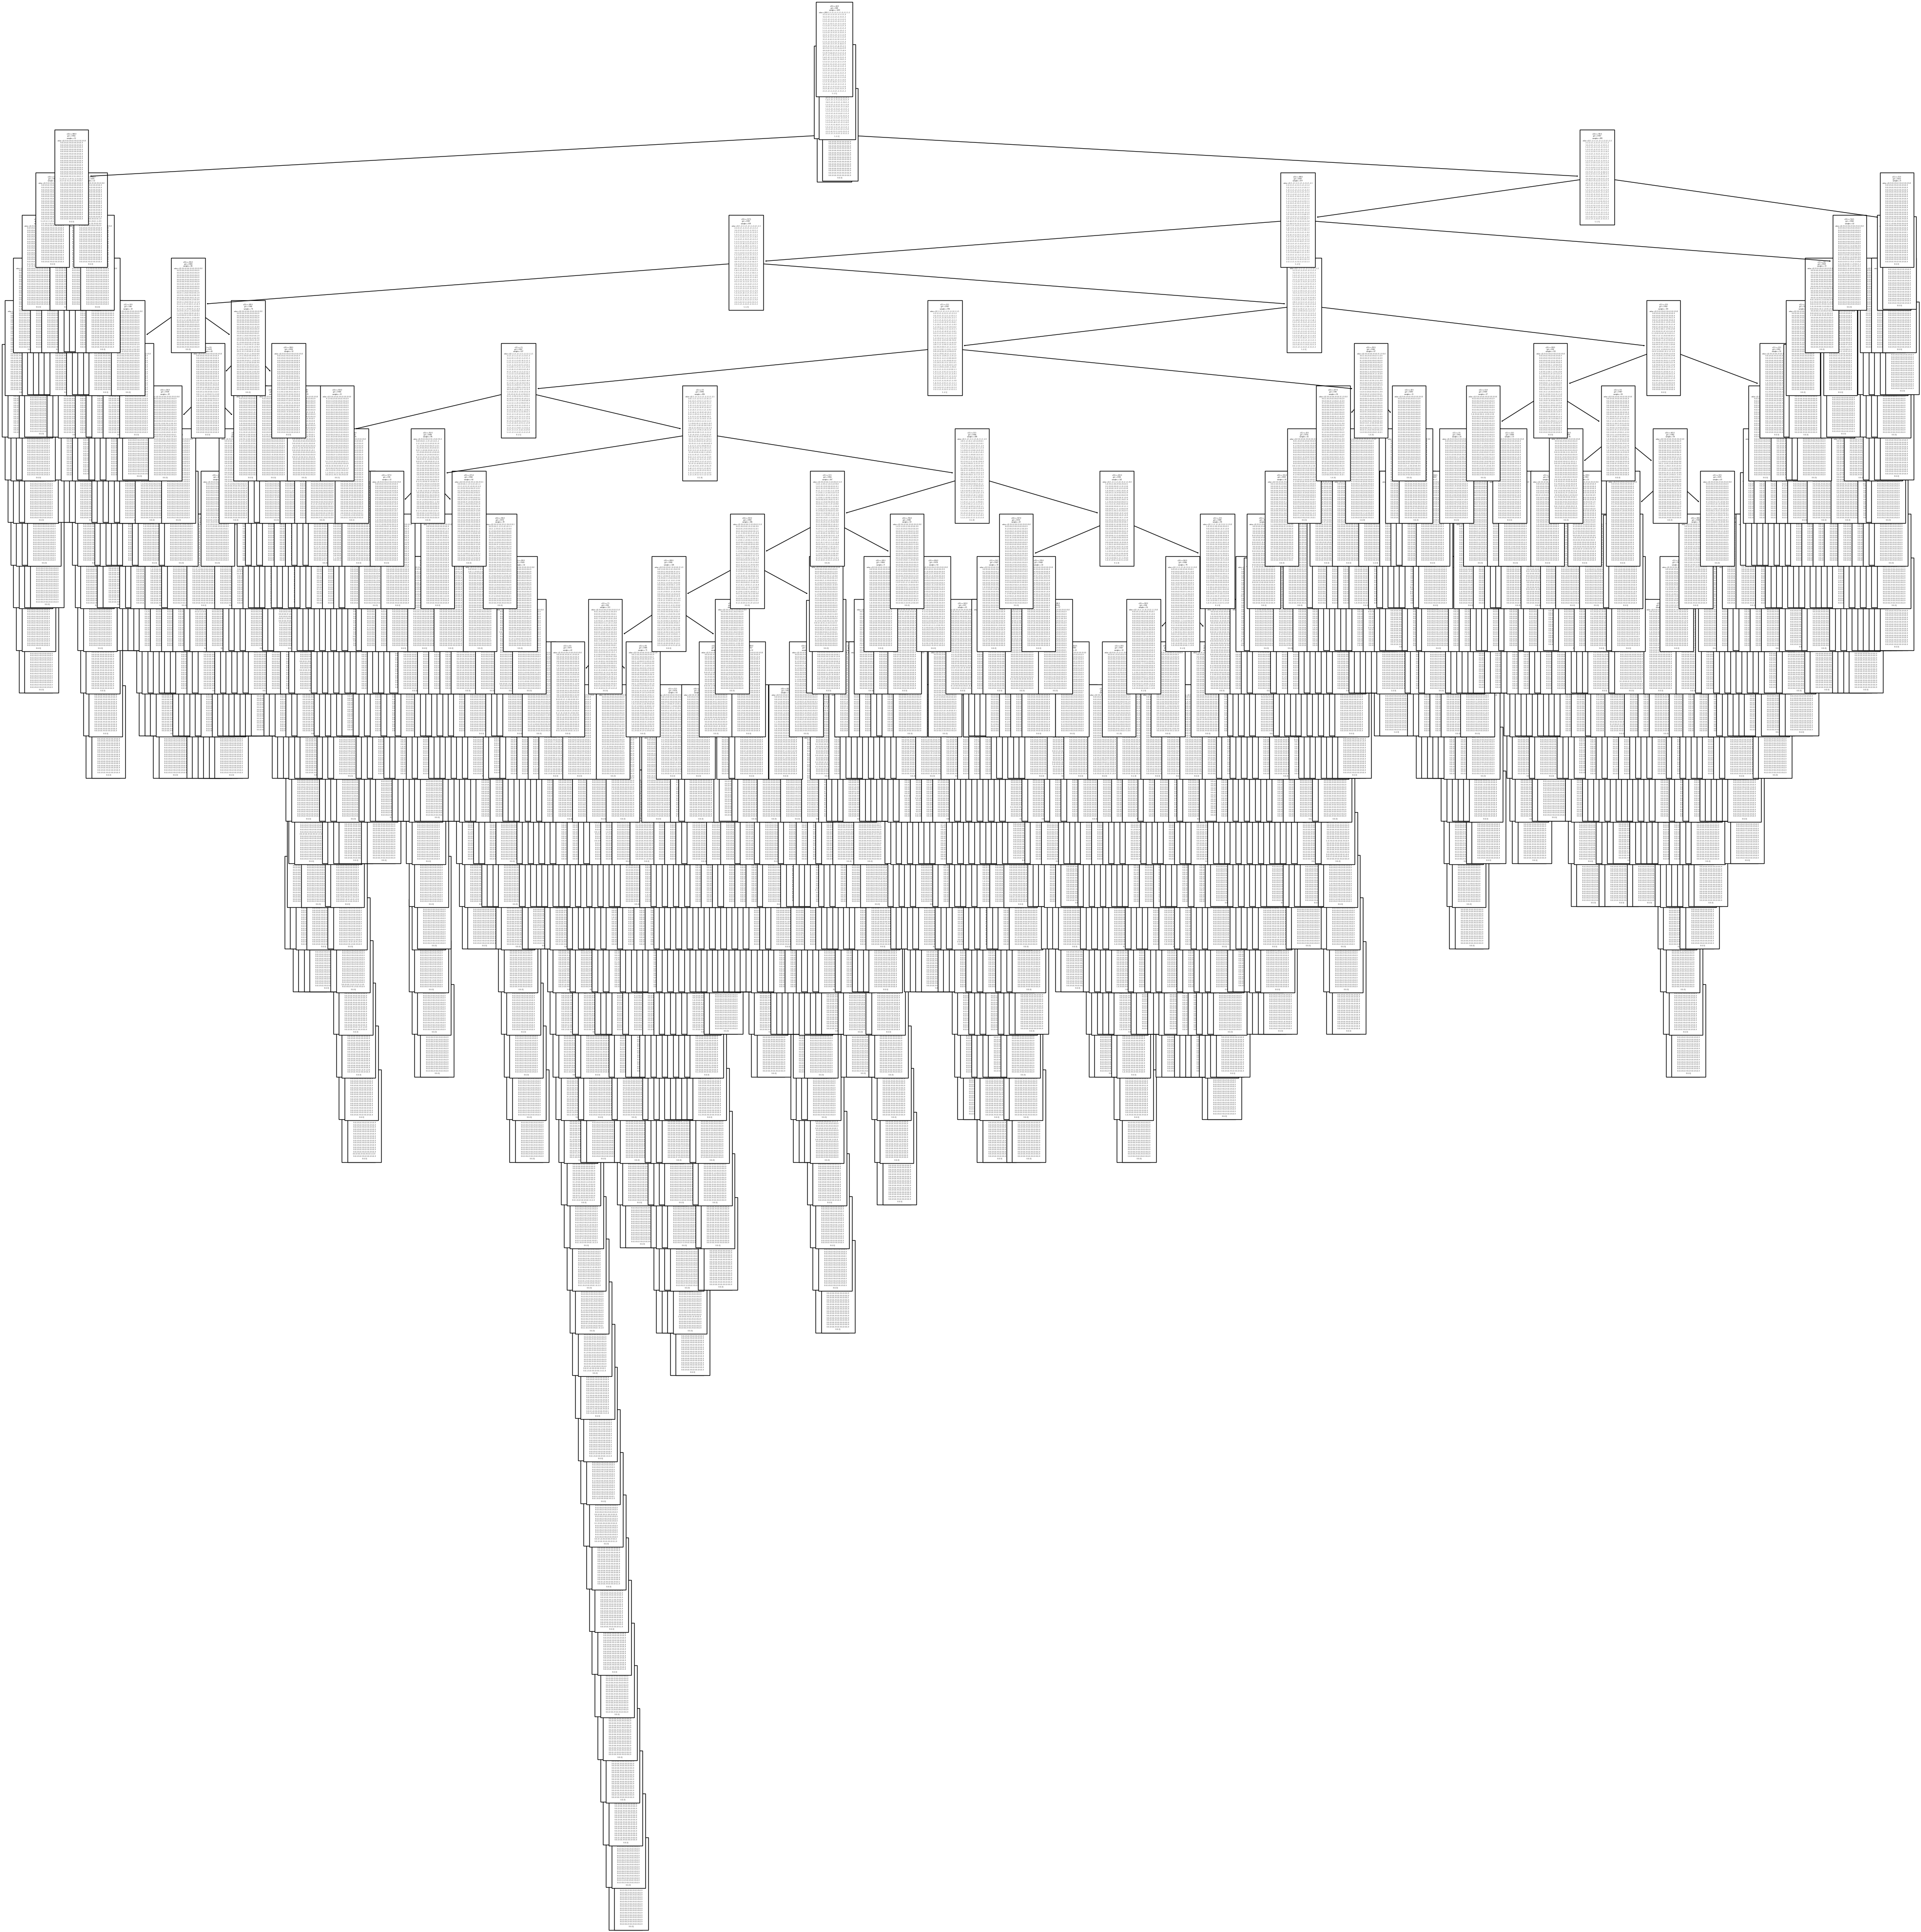

In [30]:
# plot tree
plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
tree.plot_tree(treeclass, fontsize=2)
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [32]:
print("Regression score: ",reg.score(X_train,Y_train))

Regression score:  0.03046521427593185


In [33]:
print("Regression coefficients :", reg.coef_)

Regression coefficients : [ 0.03163917 -6.51428639]


In [34]:
print("Regresion intercept: ", reg.intercept_)

Regresion intercept:  399.96264814231733


In [35]:
reg_predictions = reg.predict(X_test)

In [36]:
reg_predictions

array([302.47659191, 373.94728982, 284.61060877, 333.88752259,
       381.59720365, 276.07141549, 421.29083157, 337.70909683,
       399.43154762, 295.73406596, 268.74465873, 390.10475776,
       373.9055026 , 269.67692042, 369.64436267, 308.76263874,
       353.43038175, 301.31609066, 230.5912021 , 350.7625434 ,
       361.64303528, 308.89596079, 404.11414481, 326.00598652,
       333.87737454, 267.31751339, 320.82054528, 307.83037705,
       311.26889855, 422.49312004, 355.66999747, 328.30549789,
       396.96030965, 353.43038175, 289.21977958, 324.23419299,
       294.80180428, 406.10741254, 243.61977487, 377.58241171,
       281.67154863, 363.06679794, 397.97952847, 366.733559  ,
       275.25894512, 369.67600184, 314.34466344, 381.88195618,
       397.81456725, 398.92532089, 364.93350899, 378.37000829,
       327.37323621, 407.5311752 , 388.55782111, 256.90822638,
       320.85894982, 257.92067982, 265.73217219, 286.88524635,
       357.6632652 , 366.80022003, 375.6840615 , 386.00

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
MAE = mean_absolute_error(Y_test,reg_predictions)
MSE = mean_squared_error(Y_test,reg_predictions)
RMSE = np.sqrt(MSE)

In [40]:
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)

MAE : 239.49645580839413
MSE : 73366.61591430024
RMSE : 270.862725221283


In [42]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=100,random_state=0)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

Ada boost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       208
        67.0       0.00      0.00      0.00         1
        79.0       0.00      0.00      0.00         1
       108.0       0.00      0.00      0.00         1
       115.0       0.00      0.00      0.00         1
       121.0       0.00      0.00      0.00         1
       124.0       0.00      0.00      0.00         1
       128.0       0.00      0.00      0.00         1
       132.0       0.00      0.00      0.00         2
       134.0       0.00      0.00      0.00         1
       135.0       0.00      0.00      0.00         3
       136.0       0.00      0.00      0.00         1
       140.0       0.00      0.00      0.00         2
       142.0       0.00      0.00      0.00         1
       144.0       0.00      0.00      0.00         1
       145.0       0.00      0.00      0.00         1
       146.0       0.00      0.00      0.00         1
       147.0       0.00    

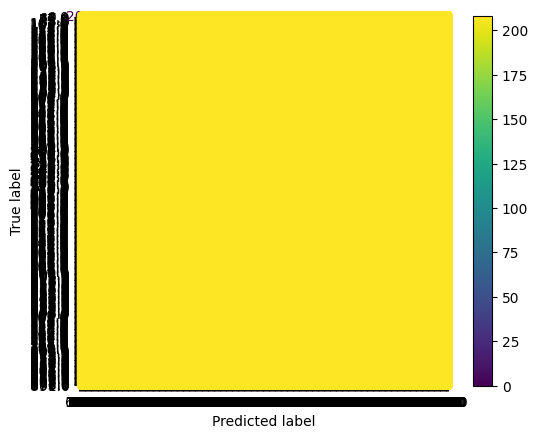

In [43]:
print("Ada boost")
report(adaboost)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)

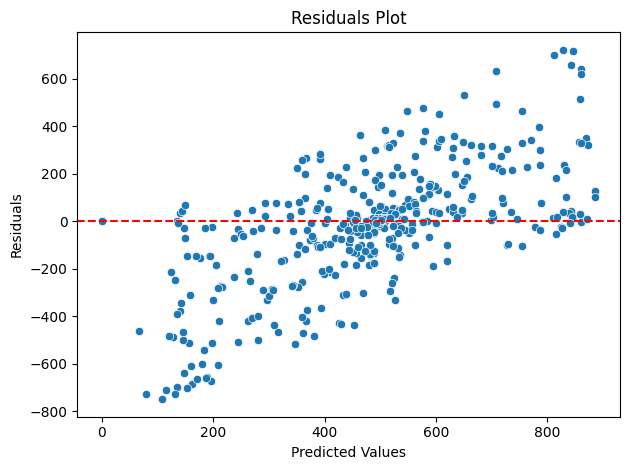

In [44]:
residuals_ada = Y_test - y_pred
sns.scatterplot(x= Y_test, y = residuals_ada)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.tight_layout()
plt.show()

Linear Regression for the we are getting MAE,MSE,RMSE:
1. MAE : 239.49645580839413
2. MSE : 73366.61591430024
3. RMSE : 270.862725221283

And for the classification type of models is:
1. Logistic Precision is 0.34 Accuraccy 0.34
2. SVM Precision is 0.96 Accuraccy 0.16
3. Random Forest Precision is 1.0 Accuracy 0.34
4. Decision Tree Presision is 1.0 Accuracy 0.34
5. Ada Boost Presicion is 1.0 Accuracy 0.34

The residual interaction with predicted is for all good
